In [2]:
#BINARY CLASSIFICATION PROBLEM
#loading the imdb dataset from keras
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
#top 10000 most frequently occuring data no word index will exceed 10000
print(f"train_data:{train_data.shape}")
print(f"train_labels:{train_labels.shape}")
print(f"test_data:{test_data.shape}")
print(f"test_labels:{test_labels.shape}")

C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
train_data:(25000,)
train_labels:(25000,)
test_data:(25000,)
test_labels:(25000,)


In [3]:
#decode review to english
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [8]:
#preparing the data
#encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
print(f"x_train:{x_train.shape}")
print(f"x_test:{x_test.shape}")
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

#input_data=vectors
#labels scalar

x_train:(25000, 10000)
x_test:(25000, 10000)


In [11]:
#model definition
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
print(model)

<Sequential name=sequential_2, built=True>


C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#compiling gthe model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#configuring the optimizer and uses of custom losses and metrics
from keras import opptimizers,losses,metrics
model2=model
model2.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
#validating the approach
'''In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data'''

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [16]:
#training of model
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7804 - loss: 0.5490 - val_accuracy: 0.8623 - val_loss: 0.4212
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8891 - loss: 0.3461 - val_accuracy: 0.8720 - val_loss: 0.3369
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9145 - loss: 0.2572 - val_accuracy: 0.8695 - val_loss: 0.3180
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9307 - loss: 0.2066 - val_accuracy: 0.8597 - val_loss: 0.3380
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9419 - loss: 0.1750 - val_accuracy: 0.8842 - val_loss: 0.2905
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9501 - loss: 0.1492 - val_accuracy: 0.8868 - val_loss: 0.2826
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9621 - loss: 0.1245 - val_accuracy: 0.8848 - val_loss: 0.2922
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9657 - loss: 0.1100 - val_accuracy: 0.8814 - v

In [17]:
history_dict=history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


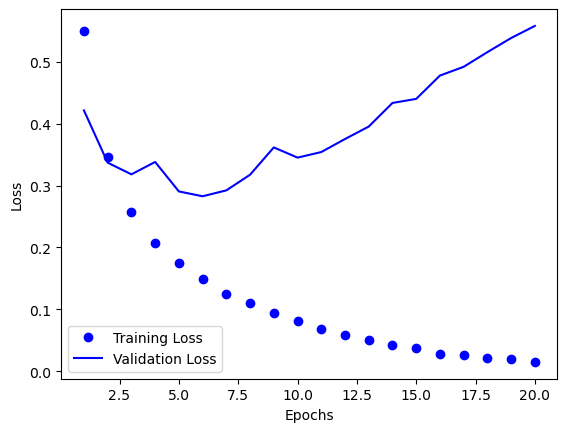

In [20]:
#plotting
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

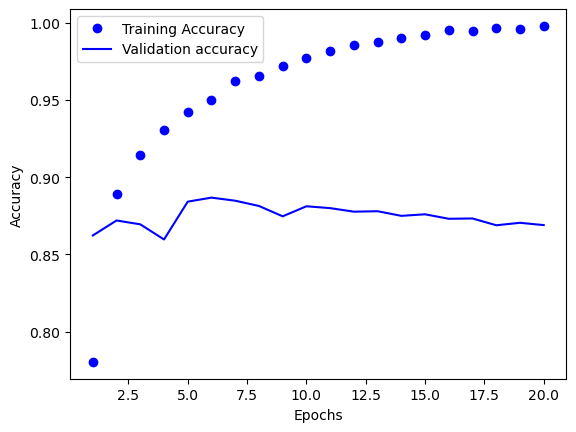

In [21]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs,acc_values,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc_values,'b',label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
#above model is example of overfitting due to too many iteration
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=4, batch_size=512)
results = model2.evaluate(x_test, y_test)
print(f"Loss:{results[0]} Accuracy:{results[1]}")

C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8222 - loss: 0.4500
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9031 - loss: 0.2703
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9236 - loss: 0.2127
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9344 - loss: 0.1807
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.3145
[0.3145146071910858, 0.8743199706077576]


In [24]:
#prediction
predict=model.predict(x_test)
print(predict)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.02489474]
 [0.99999994]
 [0.86229265]
 ...
 [0.00367532]
 [0.00992832]
 [0.9844863 ]]
